In [6]:
#Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline


In [16]:
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/Eduardo-Lares-Miranda/FisicaComputacional1/master/Actividad%204/Datosdiarios.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'TMax', 'TMin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=2, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_SON = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_Granados = df_SON.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'TMax', 'TMin']
for cols in cols_list:
  df_Granados[cols] = pd.to_numeric(df_Granados[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_Gran = df_Granados.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_Gran['Fecha']=pd.to_datetime(df_Gran['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_Gran['Año'] = df_Gran['Fecha'].dt.year
df_Gran['Mes'] = df_Gran['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_Gran.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12488 entries, 0 to 12487
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   12488 non-null  datetime64[ns]
 1   Precip  12475 non-null  float64       
 2   Evap    0 non-null      float64       
 3   TMax    12435 non-null  float64       
 4   TMin    12457 non-null  float64       
 5   Año     12488 non-null  int64         
 6   Mes     12488 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 683.1 KB
       Fecha  Precip  Evap  TMax  TMin   Año  Mes
0 1980-11-06     0.0   NaN  29.0   NaN  1980   11
1 1980-11-07     0.0   NaN  32.0   9.0  1980   11
2 1980-11-08     0.0   NaN  31.0   8.0  1980   11
3 1980-11-09     0.0   NaN  31.0   7.0  1980   11
4 1980-11-10     0.0   NaN  30.0   9.0  1980   11
           Fecha  Precip  Evap  TMax  TMin   Año  Mes
12483 2016-03-27     0.0   NaN  33.0  13.0  2016    3
12484 2016-03-28 

In [17]:
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12488 entries, 0 to 12487
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   12488 non-null  datetime64[ns]
 1   Precip  12475 non-null  float64       
 2   Evap    0 non-null      float64       
 3   TMax    12435 non-null  float64       
 4   TMin    12457 non-null  float64       
 5   Año     12488 non-null  int64         
 6   Mes     12488 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 683.1+ KB
       Fecha  Precip  Evap  TMax  TMin   Año  Mes
0 1980-11-06     0.0   NaN  29.0   NaN  1980  Nov
1 1980-11-07     0.0   NaN  32.0   9.0  1980  Nov
2 1980-11-08     0.0   NaN  31.0   8.0  1980  Nov
3 1980-11-09     0.0   NaN  31.0   7.0  1980  Nov
4 1980-11-10     0.0   NaN  30.0   9.0  1980  Nov


#Análisis Exploratorio de Datos

In [18]:
#Nos ayudamos de las bibliotecas de Python Matplotlib
#Seaborn y algunas otras
# Forma y dimensiones del DataFrame
print(df_meteo.shape)

# Tipo de datos de las columnas
print(df_meteo.dtypes)

# Despliegue de renglones para visualizar la estructura del DataFrame
print(df_meteo.head())
print(df_meteo.tail())
print(df_meteo.sample(10))

# Información general de la estructura y componentes del DataFrame
print(df_meteo.info()) 

# Descripción estádistica de las variables numéricas
print(df_meteo.describe())

# Descripción estádistica de las variables categóricas
#df_meteo.describe(include='object')

# Suma de valores faltantes
df_meteo.isnull().sum()

(12488, 7)
Fecha     datetime64[ns]
Precip           float64
Evap             float64
TMax             float64
TMin             float64
Año                int64
Mes               object
dtype: object
       Fecha  Precip  Evap  TMax  TMin   Año  Mes
0 1980-11-06     0.0   NaN  29.0   NaN  1980  Nov
1 1980-11-07     0.0   NaN  32.0   9.0  1980  Nov
2 1980-11-08     0.0   NaN  31.0   8.0  1980  Nov
3 1980-11-09     0.0   NaN  31.0   7.0  1980  Nov
4 1980-11-10     0.0   NaN  30.0   9.0  1980  Nov
           Fecha  Precip  Evap  TMax  TMin   Año  Mes
12483 2016-03-27     0.0   NaN  33.0  13.0  2016  Mar
12484 2016-03-28     0.0   NaN  30.0  12.0  2016  Mar
12485 2016-03-29     0.0   NaN  27.0  16.0  2016  Mar
12486 2016-03-30     0.0   NaN  26.0   6.0  2016  Mar
12487 2016-03-31     0.0   NaN   NaN   5.0  2016  Mar
           Fecha  Precip  Evap  TMax  TMin   Año  Mes
11702 2014-02-05     0.0   NaN  24.0   2.0  2014  Feb
11367 2013-03-07     0.0   NaN  29.0  13.0  2013  Mar
315   1981-09-

Fecha         0
Precip       13
Evap      12488
TMax         53
TMin         31
Año           0
Mes           0
dtype: int64

#Actividad 2

Hacemos análisis de datos con apoyo de histogramas. Serán de las variables precipitación, evaporación, temperatura máxima y mínima.

#Precipitación

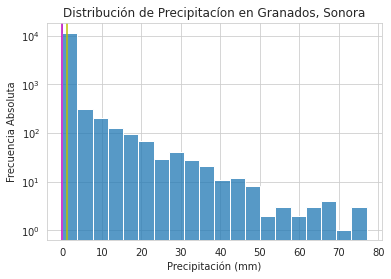

In [20]:
sns.set_style("whitegrid")
#Nombre de los ejes y título del gráfico
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de Precipitacíon en Granados, Sonora')

sns.histplot(data=df_meteo, x='Precip', bins=20, log_scale=(False,True));

# Definimos las cantidades: Promedio y Mediana
Pmed  = df_meteo.Precip.median()
Pprom = df_meteo.Precip.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Pmed, color = 'm');
plt.axvline(Pprom, color = 'y');

plt.show()

Función de probabilidad de la precipitación.

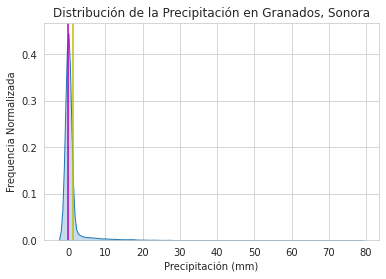

In [23]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Precip, fill=True);
plt.axvline(Pmed, color = 'm'); 
plt.axvline(Pprom, color = 'y');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Granados, Sonora')

plt.show()

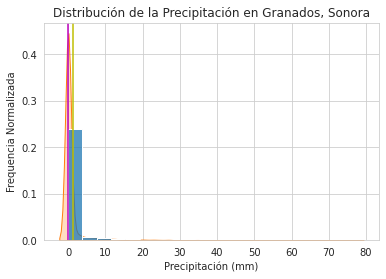

In [24]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Precip', bins=20, stat='density');
sns.kdeplot(df_meteo.Precip, fill=True);

plt.axvline(Pmed, color = 'm'); 
plt.axvline(Pprom, color = 'y');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Granados, Sonora')

plt.show()


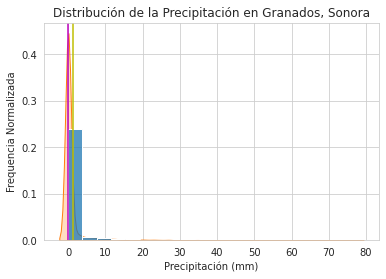

In [25]:
# Gráfica de la Precipitación y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Pmed = df_meteo.Precip.median() 
Pprom = df_meteo.Precip.mean()

sns.histplot(data=df_meteo, x='Precip', bins=20, stat='density');
sns.kdeplot(df_meteo.Precip, fill=True);

plt.axvline(Pmed, color = 'm'); 
plt.axvline(Pprom, color = 'y');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Granados, Sonora')

plt.show()

In [26]:
#print(Pmed)
print(Pprom)

1.25374749498998


#Evaporación

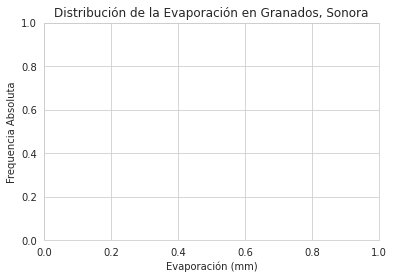

In [27]:
sns.set_style("whitegrid")

#Definir cantidades específicas:Promedio y mediana
Emed= df_meteo.Evap.median()
Eprom= df_meteo.Evap.mean()

sns.histplot(data=df_meteo, x='Evap', bins=20);

#Líneas verticales para ubicar el promedio y mediana.
plt.axvline(x=Emed, color='m', label='m')
plt.axvline(x=Eprom, color='y', label='x')

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Evaporación en Granados, Sonora')

plt.show()

Funcion de probabilidad de la evaporación.

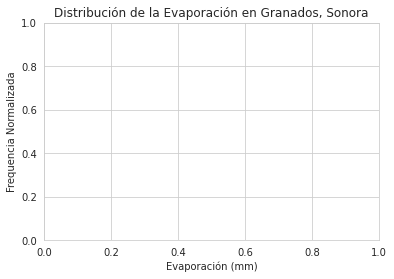

In [28]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Evap, fill=True);
plt.axvline(Emed, color = 'm'); 
plt.axvline(Eprom, color = 'y');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en Granados, Sonora')

plt.show()

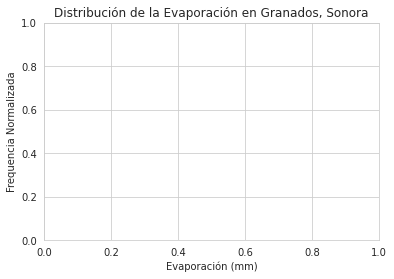

In [29]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='Evap', bins=20, stat='density');
sns.kdeplot(df_meteo.Evap, fill=True);

plt.axvline(Emed, color = 'm'); 
plt.axvline(Eprom, color = 'y');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en Granados, Sonora')

plt.show()

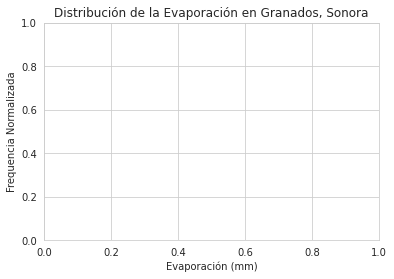

In [30]:
# Gráfica de la Evaporación y KDE
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Emed = df_meteo.Evap.median() 
Eprom = df_meteo.Evap.mean()

sns.histplot(data=df_meteo, x='Evap', bins=20, stat='density');
sns.kdeplot(df_meteo.Evap, fill=True);

plt.axvline(Emed, color = 'm'); 
plt.axvline(Eprom, color = 'y');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en Granados, Sonora')

plt.show()

In [31]:
print(Emed)
print(Eprom)

nan
nan


#Temperatura máxima

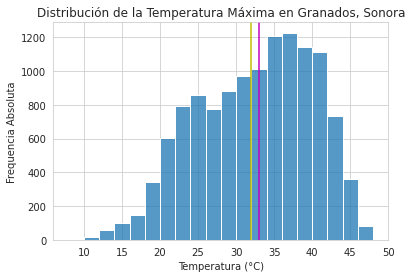

In [32]:
#Histograma con Seaborn de la Temperatura Máxima.
sns.set_style("whitegrid")

#Definir cantidades específicas:Promedio y mediana
Tmed= df_meteo.TMax.median()
Tprom= df_meteo.TMax.mean()

sns.histplot(data=df_meteo, x='TMax', bins=20);

#Líneas verticales para ubicar el promedio y mediana.
plt.axvline(x= Tmed, color='m', label='m')
plt.axvline(x= Tprom, color='y', label='x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Granados, Sonora')

plt.show()

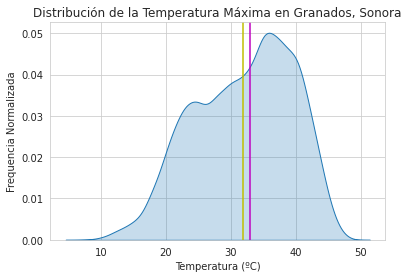

In [34]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.TMax, fill=True);
plt.axvline(Tmed, color = 'm'); 
plt.axvline(Tprom, color = 'y');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Granados, Sonora')

plt.show()

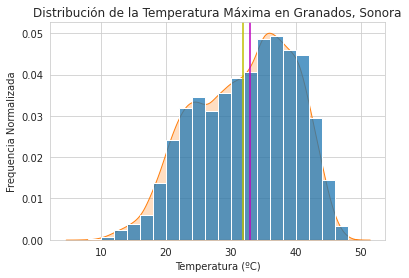

In [35]:
# Sobreponemos ambas
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='TMax', bins=20, stat='density');
sns.kdeplot(df_meteo.TMax, fill=True);

plt.axvline(Tmed, color = 'm'); 
plt.axvline(Tprom, color = 'y');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Granados, Sonora')

plt.show()

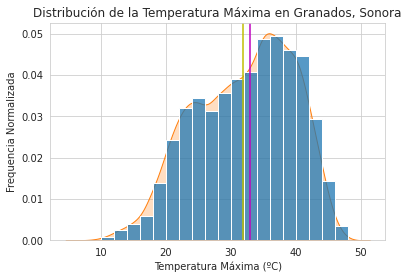

In [36]:
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.TMax.median() 
Tprom = df_meteo.TMax.mean()

sns.histplot(data=df_meteo, x='TMax', bins=20, stat='density');
sns.kdeplot(df_meteo.TMax, fill=True);

plt.axvline(Tmed, color = 'm'); 
plt.axvline(Tprom, color = 'y');

plt.xlabel('Temperatura Máxima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Granados, Sonora')

plt.show()

In [37]:
print(Tmed)
print(Tprom)

33.0
31.949802975472455


#Temperatura mínima

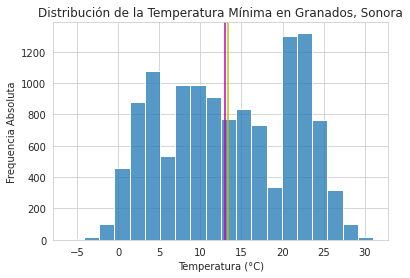

In [38]:
sns.set_style("whitegrid")

#Definir cantidades específicas:Promedio y mediana
Tmed= df_meteo.TMin.median()
Tprom= df_meteo.TMin.mean()

sns.histplot(data=df_meteo, x='TMin', bins=20);

#Líneas verticales para ubicar el promedio y mediana.
plt.axvline(x= Tmed, color='m', label='m')
plt.axvline(x= Tprom, color='y', label='x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Granados, Sonora')

plt.show()

Función de probabilidad de la temperatura mínima

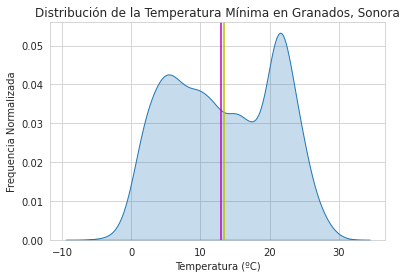

In [39]:
# Gráfica de KDE (Kernel Density Estimate)
# o gráfica de la función de densidad de probabilidad.
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.TMin, fill=True);
plt.axvline(Tmed, color = 'm'); 
plt.axvline(Tprom, color = 'y');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Granados, Sonora')

plt.show()


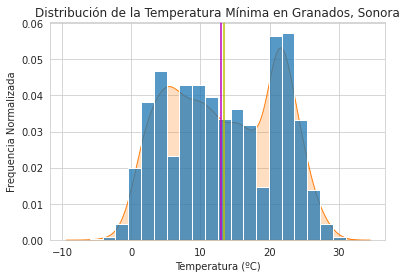

In [40]:
sns.set_style("whitegrid")

sns.histplot(data=df_meteo, x='TMin', bins=20, stat='density');
sns.kdeplot(df_meteo.TMin, fill=True);

plt.axvline(Tmed, color = 'm'); 
plt.axvline(Tprom, color = 'y');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Granados, Sonora')

plt.show()

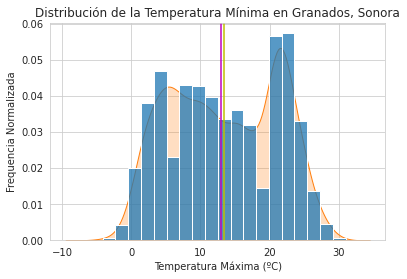

In [41]:
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteo.TMin.median() 
Tprom = df_meteo.TMin.mean()

sns.histplot(data=df_meteo, x='TMin', bins=20, stat='density');
sns.kdeplot(df_meteo.TMin, fill=True);

plt.axvline(Tmed, color = 'm'); 
plt.axvline(Tprom, color = 'y');

plt.xlabel('Temperatura Máxima (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Granados, Sonora')

plt.show()

In [42]:
print(Tmed)
print(Tprom)

13.0
13.406165208316612


#Actividad 3

Creamos las gráficas para las variables antes calculadas

#Evaporación

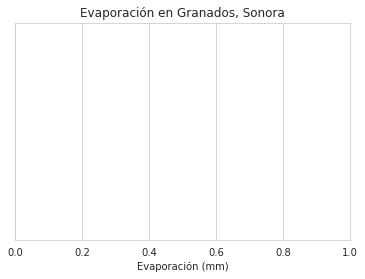

In [43]:
# Gráfica de caja para Evaporación utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(
    xlabel='Evaporación (mm)', title= 'Evaporación en Granados, Sonora');

#Temperatura máxima


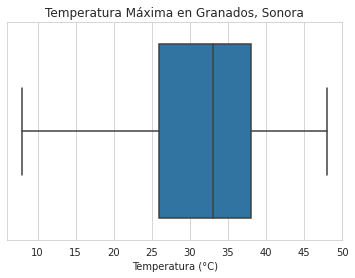

In [44]:
# Gráfica de caja para la Temperatura Máxima utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteo.TMax, data=df_meteo, orient='h').set(
    xlabel='Temperatura (°C)', title= 'Temperatura Máxima en Granados, Sonora');

#Temperatura mínima

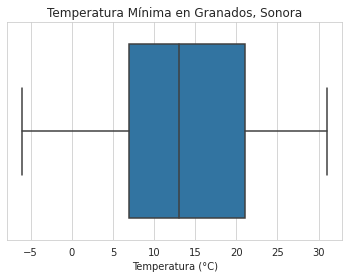

In [45]:
# Gráfica de caja para la Temperatura Mínima utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteo.TMin, data=df_meteo, orient='h').set(
    xlabel='Temperatura (°C)', title= 'Temperatura Mínima en Granados, Sonora');

#Actividad 4

Realizaremos las gráficas para la precipitación agrupando por años  después por meses.

In [46]:
# Seleccionaremos un conjunto de 20 datos en 12 años  
df_50 = df_meteo[(df_meteo['Año'] >= 1980) & (df_meteo['Año'] < 1992)]
df_70 = df_meteo[(df_meteo['Año'] >= 1992) & (df_meteo['Año'] < 2004)]
df_90 = df_meteo[(df_meteo['Año'] >= 2004) & (df_meteo['Año'] < 2016)]

Precipitación promedio por año

1980 a 1992

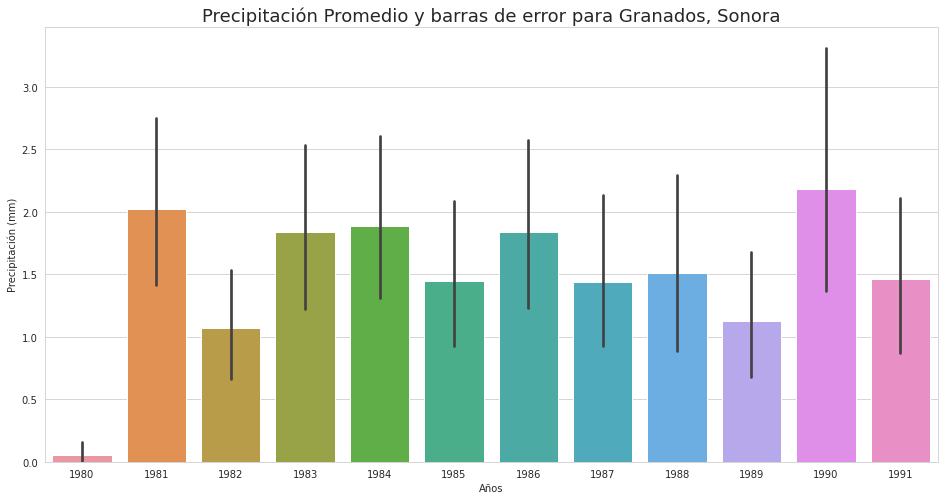

In [48]:
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_50);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Granados, Sonora', fontsize=18)

plt.show()

1992 a 2004

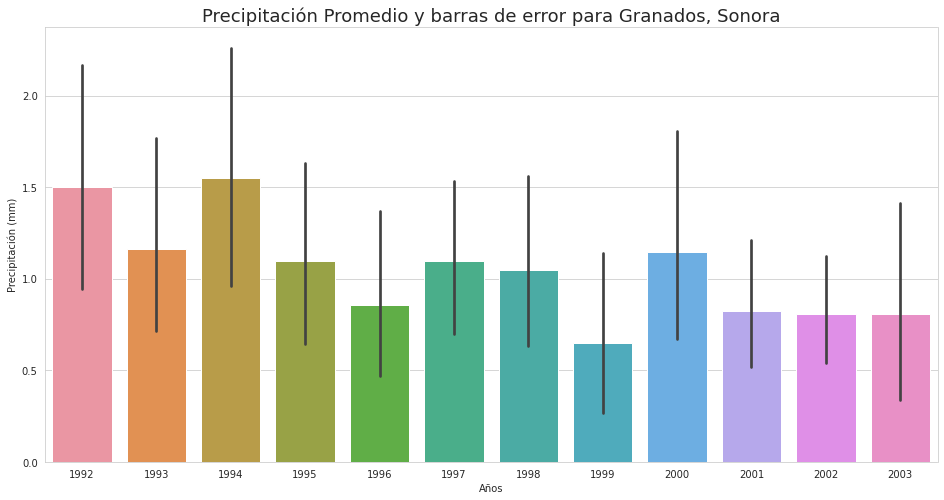

In [49]:
# Gráfica de Precipitación últimos 12 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_70);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Granados, Sonora', fontsize=18)

plt.show()

2004 a 2016

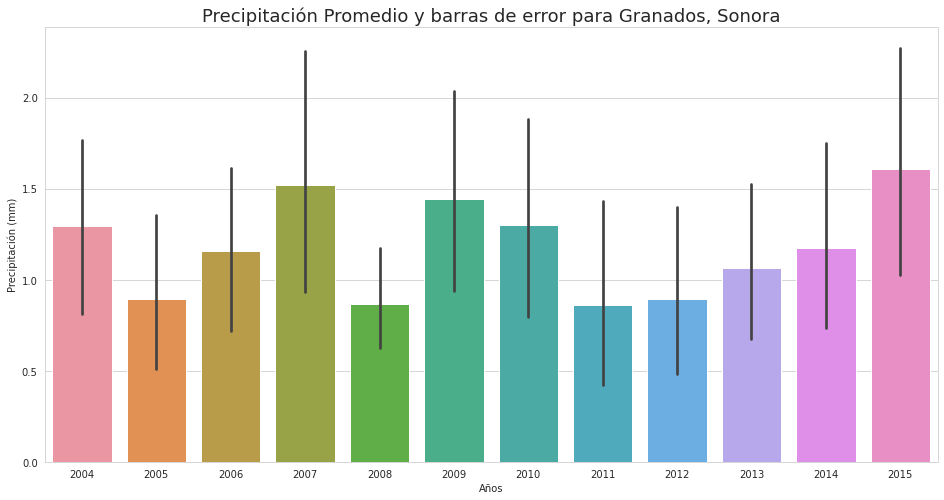

In [50]:
# Gráfica de Precipitación últimos 12 años
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Granados, Sonora', fontsize=18)

plt.show()

Precipitación promedio agrupada por mes

1980 a 1992

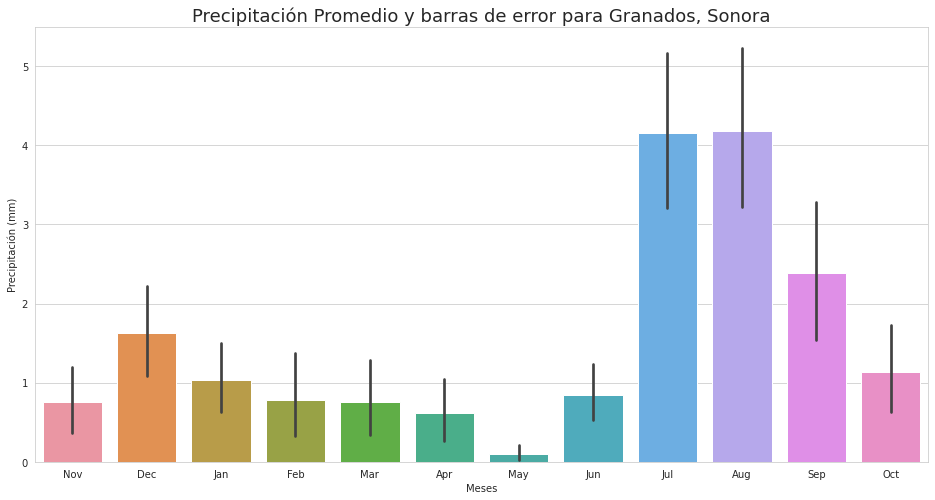

In [51]:
# Gráfica de Precipitación últimos 12 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_50);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Granados, Sonora', fontsize=18)

plt.show()

1992 a 2004

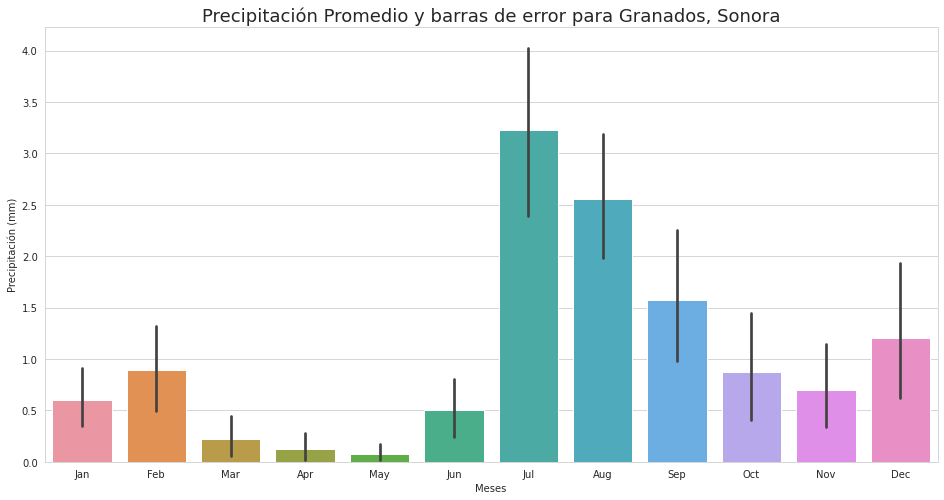

In [52]:
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_70);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Granados, Sonora', fontsize=18)

plt.show()

2004 a 2016

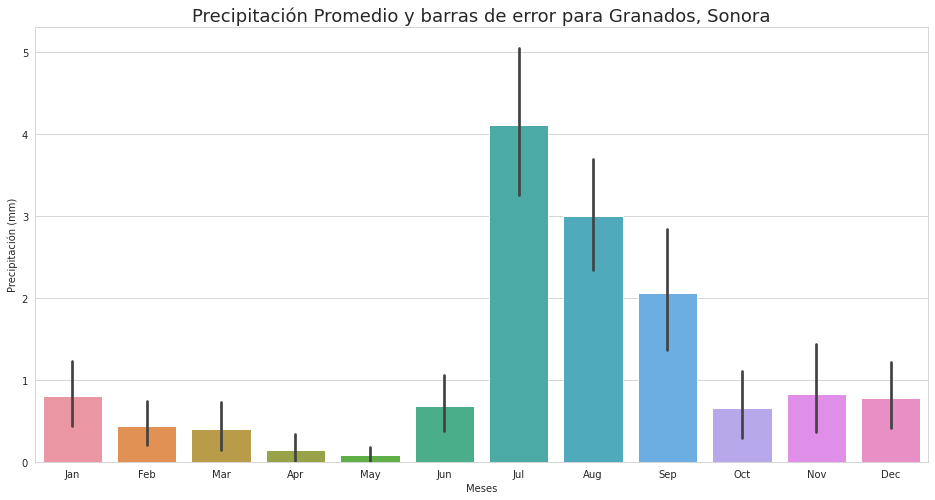

In [53]:
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip', data=df_90);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Granados, Sonora', fontsize=18)

plt.show()

#Actividad 5

Crear una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Crear las gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 30 Años). Con (Función: sns.lineplot())

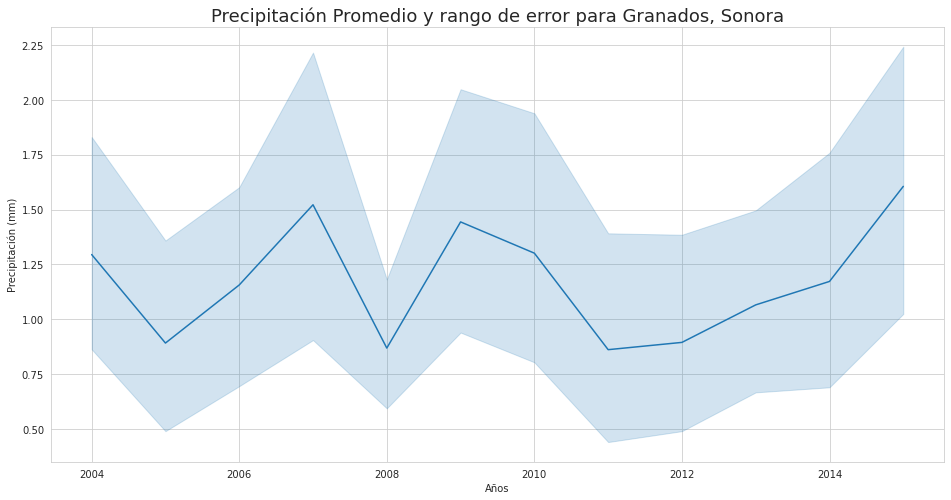

In [54]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Granados, Sonora', fontsize=18)

plt.show()

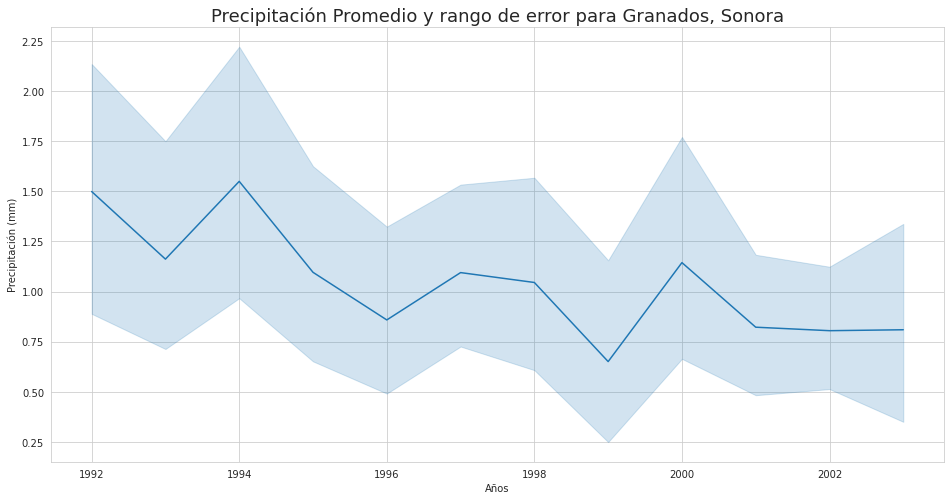

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip', data=df_70);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Granados, Sonora', fontsize=18)

plt.show()

Temperatura máxima y mínima promedio por año.

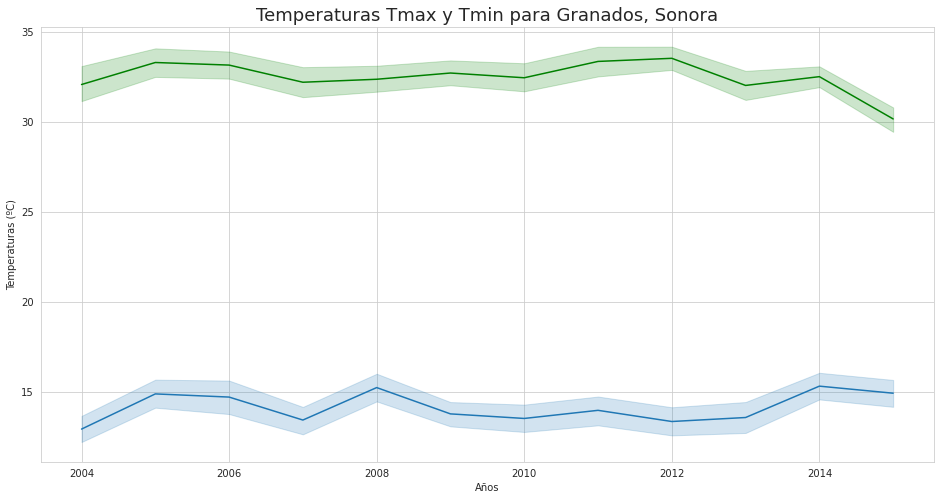

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='TMax', data=df_90, color='g');
sns.lineplot(x='Año', y='TMin', data=df_90);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Granados, Sonora', fontsize=18)

plt.show()

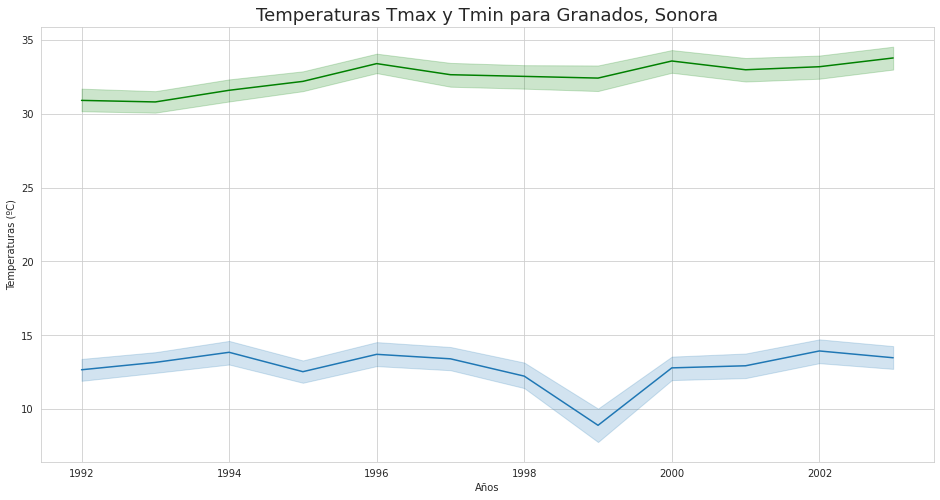

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='TMax', data=df_70, color='g');
sns.lineplot(x='Año', y='TMin', data=df_70);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Granados, Sonora', fontsize=18)

plt.show()

#Actividad 6

Con el conjunto de 30 años de datos, produzca diagramas de cajas (Función: sns.boxplot()) para observar la variabilidad de las Temperaturas (Max y Tmin) y la Evaporación agrupados por Mes.

Temperaturas máximas y mínimas


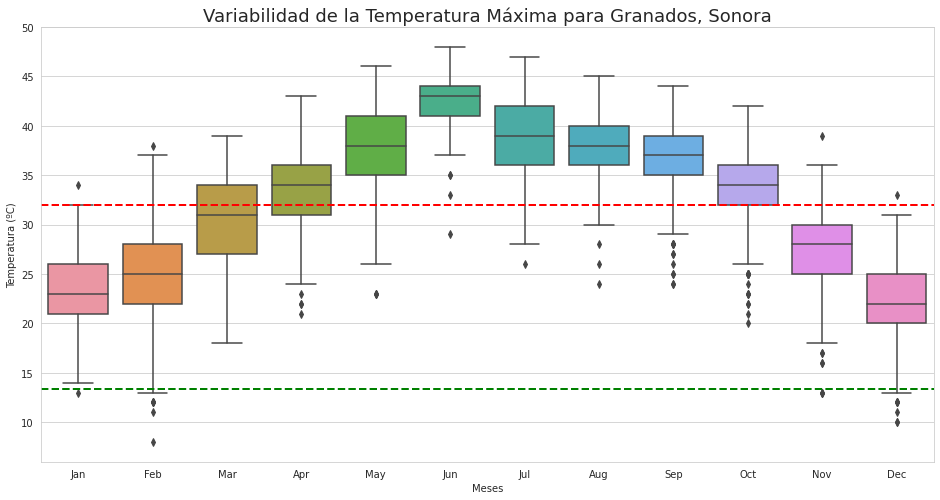

mean(Tmax) =  31.949802975472455
mean(Tmin) =  13.406165208316612
Diff Tmax_ave-Tmin_ave =  18.543637767155843


In [58]:
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.TMax.mean()
Tmin_ave = df_meteo.TMin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='TMax', data=df_90);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'g', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Granados, Sonora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

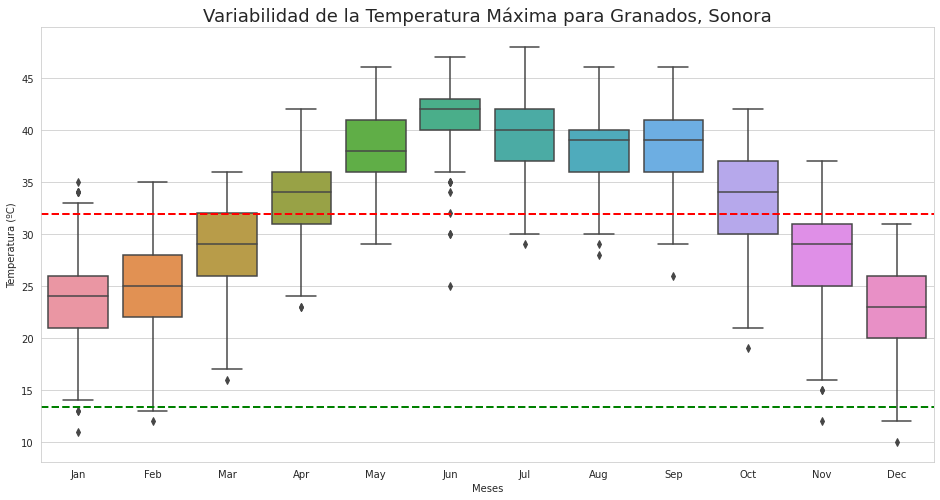

mean(Tmax) =  31.949802975472455
mean(Tmin) =  13.406165208316612
Diff Tmax_ave-Tmin_ave =  18.543637767155843


In [59]:
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.TMax.mean()
Tmin_ave = df_meteo.TMin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='TMax', data=df_70);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'g', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Granados, Sonora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

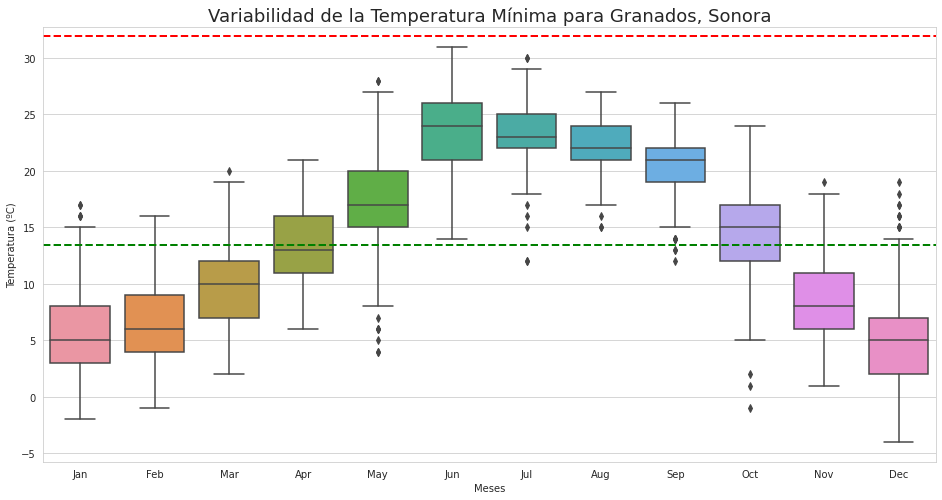

mean(Tmax) =  31.949802975472455
mean(Tmin) =  13.406165208316612
Diff Tmax_ave-Tmin_ave =  18.543637767155843


In [60]:
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.TMax.mean()
Tmin_ave = df_meteo.TMin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='TMin', data=df_90);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'g', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Granados, Sonora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

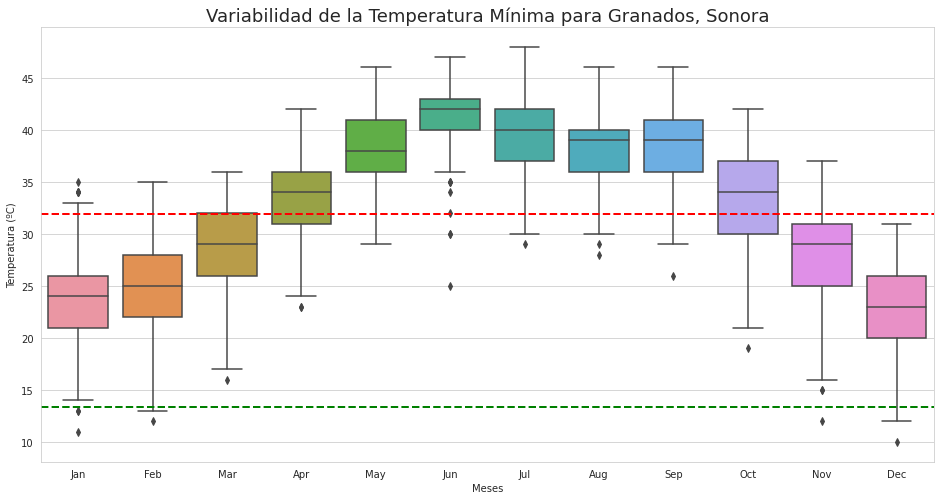

mean(Tmax) =  31.949802975472455
mean(Tmin) =  13.406165208316612
Diff Tmax_ave-Tmin_ave =  18.543637767155843


In [61]:
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.TMax.mean()
Tmin_ave = df_meteo.TMin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='TMax', data=df_70);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'g', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Granados, Sonora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

Gráfica de Boxplot de la precipitación por mes

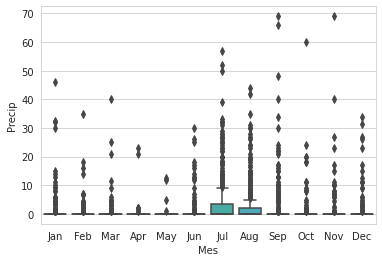

In [62]:
sns.boxplot(x='Mes' , y='Precip', data=df_90);

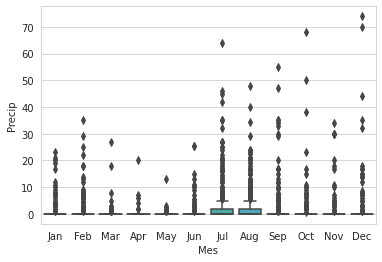

In [63]:
sns.boxplot(x='Mes' , y='Precip', data=df_70);